<a href="https://colab.research.google.com/github/LeonWa24/Dai_AirBnB/blob/main/AirBnB_V1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AirBnB pricing model

The objective of this mission is to analyze and develop a model to determine the optimal pricing for Airbnb listings, with a specific focus on properties located in the Berlin area. The project involves several key steps. First, it requires collecting data on various Airbnb listings, including factors such as location, amenities, property type, and customer reviews. Next, the project entails performing exploratory data analysis to identify patterns and correlations that affect pricing. After that, the task is to develop a predictive model using appropriate statistical and machine learning techniques to estimate the ideal price for an Airbnb listing.

The data is made accessible by the Kaggle user "The Devastator" and is available at the following link: [Berlin Airbnb Ratings: How Hosts Measure Up](https://www.kaggle.com/datasets/thedevastator/berlin-airbnb-ratings-how-hosts-measure-up).

Following packages are needed to execute the code in this Notebook.

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

This part of the code is for importing the Dataset. Due to the sisze of the .csv a link to the locally downloaded file is neccesary.

**Please paste the Link to the file on your system**

In [62]:
import pandas as pd

#Data = pd.read_csv('https://raw.githubusercontent.com/LeonWa24/DaLi_AirBnB/main/DataBerlin/output_done_1.csv')

#My local Colab Session
Data = pd.read_csv('/content/Airbnb Berlin.csv')


print(Data.head())


<ipython-input-62-3fac6414f99e>:6: DtypeWarning: Columns (19,32) have mixed types. Specify dtype option on import or set low_memory=False.
  Data = pd.read_csv('/content/Airbnb Berlin.csv')


   index   Review ID review_date  Reviewer ID Reviewer Name  \
0      0  58660447.0    01-03-16   14876562.0        Dennis   
1      1         NaN         NaN          NaN           NaN   
2      2  58663795.0    01-03-16   49367757.0       Andreea   
3      3  59003619.0    01-05-16   46694292.0         Sasha   
4      4  66845661.0    03-25-16   54542819.0        Yohana   

                                            Comments  Listing ID  \
0  Very nice, clean appartement! Josh was really ...    10002699   
1                                                NaN    10002922   
2  Aki is really nice and friendly. We had an ama...    10006647   
3  Aki is a very nice dude with a clean place in ...    10006647   
4  Aki's place was easy to find and located in th...    10006647   

                             Listing URL                     Listing Name  \
0  https://www.airbnb.com/rooms/10002699  Trendy and peaceful KreuzkÃ¶lln   
1  https://www.airbnb.com/rooms/10002922  Sehr zentrale Wo

In [16]:
print(Data.columns)


Index(['index', 'Review ID', 'review_date', 'Reviewer ID', 'Reviewer Name',
       'Comments', 'Listing ID', 'Listing URL', 'Listing Name', 'Host ID',
       'Host URL', 'Host Name', 'Host Since', 'Host Response Time',
       'Host Response Rate', 'Is Superhost', 'neighbourhood',
       'Neighborhood Group', 'City', 'Postal Code', 'Country Code', 'Country',
       'Latitude', 'Longitude', 'Is Exact Location', 'Property Type',
       'Room Type', 'Accomodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Square Feet', 'Price', 'Guests Included', 'Min Nights', 'Reviews',
       'First Review', 'Last Review', 'Overall Rating', 'Accuracy Rating',
       'Cleanliness Rating', 'Checkin Rating', 'Communication Rating',
       'Location Rating', 'Value Rating', 'Instant Bookable',
       'Business Travel Ready'],
      dtype='object')


First of all we need to figure out what influences the price most. Therefore lets take a look a the general price distribution.

In [63]:
if Data['Price'].dtype != 'float':
    Data['Price'] = Data['Price'].str.replace(',', '').astype('float')
    print("Price column converted to float.")
else:
    print("Price column is already of type float.")

Price column converted to float.


count    227585.000000
mean         69.606323
std         117.210603
min           0.000000
25%          37.000000
50%          52.000000
75%          80.000000
max        9000.000000
Name: Price, dtype: float64


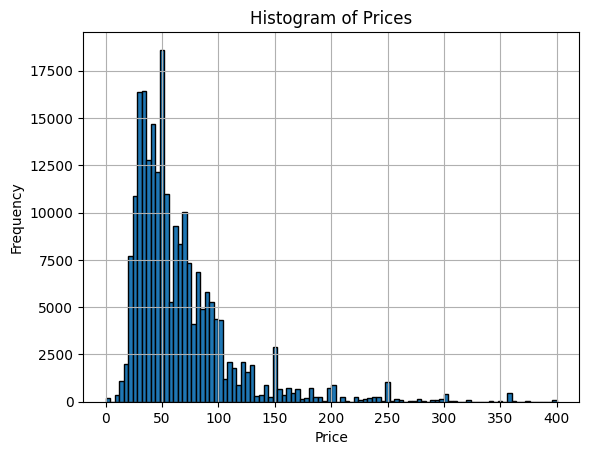

In [64]:
print(Data['Price'].describe())
plt.hist(Data['Price'], bins=100, range=(0, 400), edgecolor='black')
plt.title('Histogram of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

count       452805
unique        3000
top       04-22-19
freq          1353
Name: review_date, dtype: object


<ipython-input-65-1faddd8cabba>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  Data['review_date'] = pd.to_datetime(Data['review_date'])


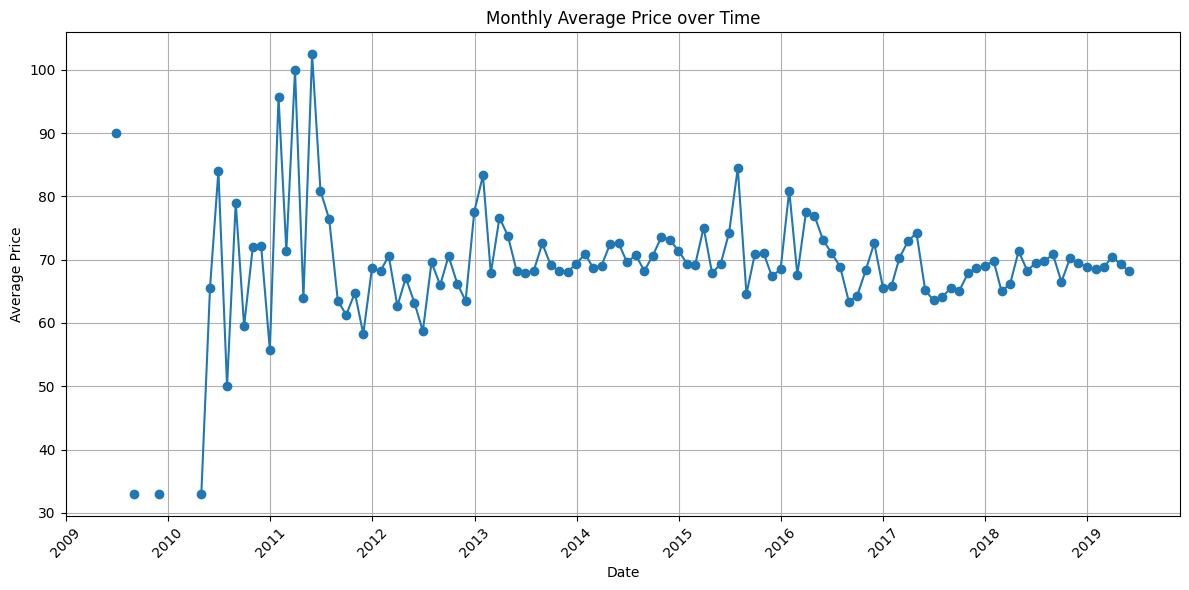

count                           452805
mean     2017-08-18 20:06:15.992314880
min                2009-06-20 00:00:00
25%                2016-10-16 00:00:00
50%                2017-12-22 00:00:00
75%                2018-09-24 00:00:00
max                2019-05-14 00:00:00
Name: review_date, dtype: object


In [65]:
print(Data['review_date'].describe())
# Convert 'review_date' to datetime if it's not already
if Data['review_date'].dtype != 'datetime64[ns]':
    Data['review_date'] = pd.to_datetime(Data['review_date'])

# Calculate monthly average of 'price'
monthly_avg_price = Data.groupby(pd.Grouper(key='review_date', freq='M'))['Price'].mean()

# Plotting the time series of monthly average price
plt.figure(figsize=(12, 6))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, marker='o', linestyle='-')
plt.title('Monthly Average Price over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(Data['review_date'].describe())